In [145]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pandas import  *
from numpy import *
from sklearn import *
import warnings
from sklearn.preprocessing import Imputer
warnings.filterwarnings('ignore')
inf552= pd.read_csv("C:\\Users\\DELL\\Desktop\\INF552\\HM6\\wdbc.csv",header=None,usecols=list(range(1,32)),names=['class']+list(range(0,30)))
inf552=inf552.replace('M',1)
inf552=inf552.replace('B',0)
positive=inf552[inf552['class']==1]
negtive=inf552[inf552['class']==0]

In [146]:
#  Choose 20% of the data randomly as the test set, the rest 80% as the trainning data
test_pos=positive.sample(frac=0.2,random_state=123 ,axis=0)
train_pos=positive.drop(index=test_pos.index)
test_neg=negtive.sample(frac=0.2,random_state=123 ,axis=0)
train_neg=negtive.drop(index=test_neg.index)
testdata=  pd.concat([test_pos, test_neg])
traindata=  pd.concat([train_pos, train_neg])

In [147]:
#Supervised Learning: Train an L1-penalized SVM
from sklearn import preprocessing
from sklearn.svm import LinearSVC
train_normalized = preprocessing.normalize(traindata[list(range(0,30))])
test_normalized = preprocessing.normalize(testdata[list(range(0,30))])
#determine the ranges for λ that keep the accuracy above a threshold (e.g.60%)
cls1 = LinearSVC(penalty='l1',random_state=123,dual=False,C=10**(-2)).fit(train_normalized, traindata['class'])
print('the accuracy for λ = 10−2 is: ',cls1.score(train_normalized, traindata['class']))
cls2 = LinearSVC(penalty='l1',random_state=123,dual=False,C=10**(6)).fit(train_normalized, traindata['class'])
print('the accuracy for λ = 10+6 is: ',cls2.score(train_normalized, traindata['class']))
print('the accuracy will not below 60% for λ = 10−2 and λ = 10+6')

the accuracy for λ = 10−2 is:  0.6271929824561403
the accuracy for λ = 10+6 is:  0.9846491228070176
the accuracy will not below 60% for λ = 10−2 and λ = 10+6


In [148]:
# Determine the weight of the SVM penalty using 5 fold cross validation. 
from sklearn.model_selection import GridSearchCV
C_range1 = np.logspace(-2, 6, 10)
param_grid1 = dict(C=C_range1)
s_cls = LinearSVC(penalty='l1',random_state=123,dual=False)
s_model =  GridSearchCV(s_cls, param_grid=param_grid1, cv=5).fit(train_normalized, traindata['class'])

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       |      accuracy      |      precision     |       recall       |      F-score       |        AUC         |
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
| train | 0.9824561403508771 | 0.9821428571428571 | 0.9705882352941176 | 0.9763313609467456 | 0.9987659399424105 |
|  test | 0.9646017699115044 |       0.975        | 0.9285714285714286 | 0.951219512195122  | 0.9969818913480886 |
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
confusion matrix for train:
 [[283   3]
 [  5 165]]


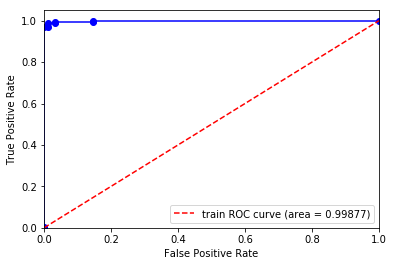

confusion matrix for test:
 [[70  1]
 [ 3 39]]


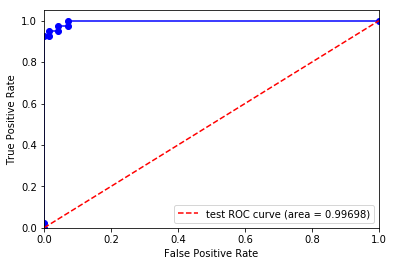

In [154]:
# Report the accuracy, precision, recall, F-score, and AUC for both training and test sets
import sklearn.metrics 
from prettytable import PrettyTable 
train_pred=s_model.predict(train_normalized)
test_pred=s_model.predict(test_normalized)
table=PrettyTable([" "," accuracy"," precision"," recall","F-score","AUC"])
table.add_row(["train",metrics.accuracy_score(traindata['class'], train_pred),metrics.precision_score(traindata['class'], train_pred),metrics.recall_score(traindata['class'], train_pred),metrics.f1_score(traindata['class'], train_pred),metrics.roc_auc_score(traindata['class'], s_model.decision_function(train_normalized))])
table.add_row(["test",metrics.accuracy_score(testdata['class'], test_pred),metrics.precision_score(testdata['class'], test_pred),metrics.recall_score(testdata['class'], test_pred),metrics.f1_score(testdata['class'], test_pred),metrics.roc_auc_score(testdata['class'], s_model.decision_function(test_normalized))])
print(table)
print('confusion matrix for train:\n',metrics.confusion_matrix(traindata['class'],train_pred ))
fpr, tpr, thresholds = metrics.roc_curve(traindata['class'], s_model.decision_function(train_normalized))
plt.figure()
plt.plot(fpr,tpr,"b-o")
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='train ROC curve (area = %0.5f)' %  metrics.roc_auc_score(traindata['class'], s_model.decision_function(train_normalized)))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
print('confusion matrix for test:\n',metrics.confusion_matrix(testdata['class'], test_pred))
fpr2, tpr2, thresholds2 = metrics.roc_curve(testdata['class'], s_model.decision_function(test_normalized))
plt.figure()
plt.plot(fpr2,tpr2,"b-o")
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='test ROC curve (area = %0.5f)' %  metrics.roc_auc_score(testdata['class'], s_model.decision_function(test_normalized)))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [150]:
# Monte-Carlo Simulation: 30 times
accuracy=[]; precision=[];recall=[]; F=[]; AUC=[];
accuracy2=[]; precision2=[];recall2=[]; F2=[]; AUC2=[];
for n in range(30):
    #  Choose 20% of the data randomly as the test set, the rest 80% as the trainning data
    test_p=positive.sample(frac=0.2,axis=0)
    train_p=positive.drop(index=test_p.index)
    test_n=negtive.sample(frac=0.2,axis=0)
    train_n=negtive.drop(index=test_n.index)
    test_data=  pd.concat([test_p, test_n])
    train_data=  pd.concat([train_p, train_n])
    tr_normalized = preprocessing.normalize(train_data[list(range(0,30))])
    te_normalized = preprocessing.normalize(test_data[list(range(0,30))])
    C_range = np.logspace(-2, 6, 10)
    param_grid = dict(C=C_range)
    cls_s = LinearSVC(penalty='l1',dual=False)
    model_s =  GridSearchCV(cls_s, param_grid=param_grid, cv=5).fit(tr_normalized, train_data['class'])
    pred1=model_s.predict(tr_normalized)
    pred2=model_s.predict(te_normalized)
    accuracy.append(metrics.accuracy_score(train_data['class'], pred1));accuracy2.append(metrics.accuracy_score(test_data['class'], pred2));
    precision.append(metrics.precision_score(train_data['class'], pred1));precision2.append(metrics.precision_score(test_data['class'], pred2));
    recall.append(metrics.recall_score(train_data['class'], pred1));recall2.append(metrics.recall_score(test_data['class'], pred2));
    F.append(metrics.f1_score(train_data['class'], pred1));F2.append(metrics.f1_score(test_data['class'], pred2));
    AUC.append(metrics.roc_auc_score(train_data['class'], s_model.decision_function(tr_normalized)));AUC2.append(metrics.roc_auc_score(test_data['class'],s_model.decision_function(te_normalized)));

In [297]:
# report the average of accuracy, precision, recall, F-score, and AUC for both training and test sets
table1=PrettyTable([" average "," accuracy"," precision"," recall","F-score","AUC"])
table1.add_row(["train",mean(accuracy),mean(precision),mean(recall),mean(F),mean(AUC)])
table1.add_row(["test",mean(accuracy2),mean(precision2),mean(recall2),mean(F2),mean(AUC2)])
print(table1)

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  average  |      accuracy      |      precision     |       recall       |      F-score       |        AUC         |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   train   | 0.984722222222222  | 0.9861300041466446 | 0.9727450980392155 | 0.9793648142888879 | 0.9982716303304539 |
|    test   | 0.9657817109144543 | 0.9544719027339112 | 0.9547619047619046 | 0.9540878456843721 | 0.997853789403085  |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+


In [155]:
#  Semi-Supervised Learning/ Self-training
#  Choose 20% of the data randomly as the test set, the rest 80% as the trainning data
#  select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data
test_pos=positive.sample(frac=0.2,random_state=123 ,axis=0)
train_pos=positive.drop(index=test_pos.index)
l_pos=train_pos.sample(frac=0.5,random_state=123 ,axis=0)
u_pos=train_pos.drop(index=l_pos.index)
test_neg=negtive.sample(frac=0.2,random_state=123 ,axis=0)
train_neg=negtive.drop(index=test_neg.index)
l_neg=train_neg.sample(frac=0.5,random_state=123 ,axis=0)
u_neg=train_neg.drop(index=l_neg.index)
testdata=  pd.concat([test_pos, test_neg]);traindata=  pd.concat([train_pos, train_neg])
l_data=  pd.concat([l_pos, l_neg]);u_data=  pd.concat([u_pos, u_neg])

In [156]:
# Train an L1-penalized SVM to classify the labeled data Use normalized data
l_normalized = preprocessing.normalize(l_data[list(range(0,30))])
u_normalized = preprocessing.normalize(u_data[list(range(0,30))])
l_class=list(l_data['class']);
#determine the ranges for λ that keep the accuracy above a threshold (e.g.60%)
cls1 = LinearSVC(penalty='l1',random_state=123,dual=False,C=10**(-2)).fit(l_normalized, l_class)
print('the accuracy for λ = 10−2 is: ',cls1.score(l_normalized, l_data['class']))
cls2 = LinearSVC(penalty='l1',random_state=123,dual=False,C=10**(5)).fit(l_normalized, l_class)
print('the accuracy for λ = 10+5 is: ',cls2.score(l_normalized, l_data['class']))
print('the accuracy will not below 60% for λ = 10−2 and λ = 10+5')

the accuracy for λ = 10−2 is:  0.6271929824561403
the accuracy for λ = 10+5 is:  1.0
the accuracy will not below 60% for λ = 10−2 and λ = 10+5


In [157]:
# Determine the weight of the SVM penalty using 5 fold cross validation. 
from sklearn.model_selection import GridSearchCV
C_range1 = np.logspace(-2, 5, 10)
param_grid1 = dict(C=C_range1)
s_cls = LinearSVC(penalty='l1',random_state=123,dual=False)
semi_model =  GridSearchCV(s_cls, param_grid=param_grid1, cv=5).fit(l_normalized, l_class)

In [158]:
# each time label the unlabeled data point that is the farthest to the decision boundary of the SVM and add it to labeled ones
for i in range(len(u_data)-1):
    aa=(semi_model.decision_function(u_normalized)).tolist();bb=semi_model.predict(u_normalized);
    u_index=aa.index(max(aa))
    l_normalized=np.row_stack((l_normalized,u_normalized[u_index]));l_class.append(bb[u_index]);
    u_normalized= np.delete(u_normalized,u_index , 0);
    semi_model =  GridSearchCV(s_cls, param_grid=param_grid1, cv=5).fit(l_normalized,l_class)

In [159]:
# label the last unlabled data
l_normalized=np.row_stack((l_normalized,u_normalized[-1]));l_class.append(semi_model.predict(u_normalized)[-1]);
semi_model =  GridSearchCV(s_cls, param_grid=param_grid1, cv=5).fit(l_normalized,l_class)

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       |      accuracy      |      precision     |       recall       |      F-score       |        AUC         |
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
| train | 0.9802631578947368 | 0.9707602339181286 | 0.9764705882352941 | 0.9736070381231672 | 0.9868161250514191 |
|  test | 0.9380530973451328 | 0.9069767441860465 | 0.9285714285714286 | 0.9176470588235294 | 0.993963782696177  |
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
confusion matrix for train:
 [[281   5]
 [  4 166]]


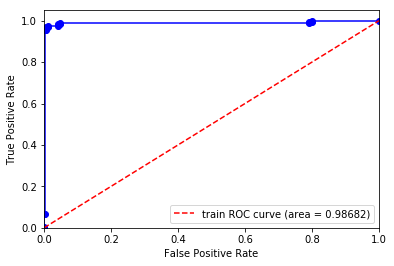

confusion matrix for test:
 [[67  4]
 [ 3 39]]


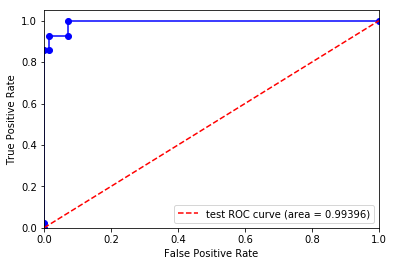

In [160]:
# Report the accuracy, precision, recall, F-score, and AUC for both training and test sets
import sklearn.metrics 
from prettytable import PrettyTable
train_normalized = preprocessing.normalize(traindata[list(range(0,30))])
test_normalized = preprocessing.normalize(testdata[list(range(0,30))])
train_pre=semi_model.predict(train_normalized)
test_pre=semi_model.predict(test_normalized)
table=PrettyTable([" "," accuracy"," precision"," recall","F-score","AUC"])
table.add_row(["train",metrics.accuracy_score(traindata['class'], train_pre),metrics.precision_score(traindata['class'], train_pre),metrics.recall_score(traindata['class'], train_pre),metrics.f1_score(traindata['class'], train_pre),metrics.roc_auc_score(traindata['class'], semi_model.decision_function(train_normalized))])
table.add_row(["test",metrics.accuracy_score(testdata['class'], test_pre),metrics.precision_score(testdata['class'], test_pre),metrics.recall_score(testdata['class'], test_pre),metrics.f1_score(testdata['class'], test_pre),metrics.roc_auc_score(testdata['class'], semi_model.decision_function(test_normalized))])
print(table)
print('confusion matrix for train:\n',metrics.confusion_matrix(traindata['class'], train_pre))
fpr, tpr, thresholds = metrics.roc_curve(traindata['class'], semi_model.decision_function(train_normalized))
plt.figure()
plt.plot(fpr,tpr,"b-o")
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='train ROC curve (area = %0.5f)' %  metrics.roc_auc_score(traindata['class'], semi_model.decision_function(train_normalized)))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
print('confusion matrix for test:\n',metrics.confusion_matrix(testdata['class'], test_pre))
fpr2, tpr2, thresholds2 = metrics.roc_curve(testdata['class'], semi_model.decision_function(test_normalized))
plt.figure()
plt.plot(fpr2,tpr2,"b-o")
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='test ROC curve (area = %0.5f)' %  metrics.roc_auc_score(testdata['class'], semi_model.decision_function(test_normalized)))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [162]:
# Monte-Carlo Simulation: 30 times
accuracy3=[]; precision3=[];recall3=[]; F3=[]; AUC3=[];
accuracy4=[]; precision4=[];recall4=[]; F4=[]; AUC4=[];
for n in range(30):
    #  Choose 20% of the data randomly as the test set, the rest 80% as the trainning data
    #  select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data
    test_pos=positive.sample(frac=0.2,axis=0)
    train_pos=positive.drop(index=test_pos.index)
    l_pos=train_pos.sample(frac=0.5,axis=0)
    u_pos=train_pos.drop(index=l_pos.index)
    test_neg=negtive.sample(frac=0.2,axis=0)
    train_neg=negtive.drop(index=test_neg.index)
    l_neg=train_neg.sample(frac=0.5,axis=0)
    u_neg=train_neg.drop(index=l_neg.index)
    testdata=  pd.concat([test_pos, test_neg]);traindata=  pd.concat([train_pos, train_neg])
    l_data=  pd.concat([l_pos, l_neg]);u_data=  pd.concat([u_pos, u_neg])
    # Train an L1-penalized SVM to classify the labeled data Use normalized data
    l_normalized = preprocessing.normalize(l_data[list(range(0,30))])
    u_normalized = preprocessing.normalize(u_data[list(range(0,30))])
    l_class=list(l_data['class']);
    C_range1 = np.logspace(-2, 5, 10)
    param_grid1 = dict(C=C_range1)
    s_cls = LinearSVC(penalty='l1',dual=False)
    semi_model =  GridSearchCV(s_cls, param_grid=param_grid1, cv=5).fit(l_normalized, l_class)
    for i in range(len(u_data)-1):
        aa=(semi_model.decision_function(u_normalized)).tolist();bb=semi_model.predict(u_normalized);
        u_index=aa.index(max(aa))
        l_normalized=np.row_stack((l_normalized,u_normalized[u_index]));l_class.append(bb[u_index]);
        u_normalized= np.delete(u_normalized,u_index , 0);
        semi_model =  GridSearchCV(s_cls, param_grid=param_grid1, cv=5).fit(l_normalized,l_class)
    # label the last unlabled data
    l_normalized=np.row_stack((l_normalized,u_normalized[-1]));l_class.append(semi_model.predict(u_normalized)[-1]);
    semi_model =  GridSearchCV(s_cls, param_grid=param_grid1, cv=5).fit(l_normalized,l_class)
    train_normal = preprocessing.normalize(traindata[list(range(0,30))])
    test_normal = preprocessing.normalize(testdata[list(range(0,30))])
    pred3=semi_model.predict(train_normal)
    pred4=semi_model.predict(test_normal)
    accuracy3.append(metrics.accuracy_score(traindata['class'], pred3));accuracy4.append(metrics.accuracy_score(testdata['class'], pred4));
    precision3.append(metrics.precision_score(traindata['class'], pred3));precision4.append(metrics.precision_score(testdata['class'], pred4));
    recall3.append(metrics.recall_score(traindata['class'], pred3));recall4.append(metrics.recall_score(testdata['class'], pred4));
    F3.append(metrics.f1_score(traindata['class'], pred3));F4.append(metrics.f1_score(testdata['class'], pred4));
    AUC3.append(metrics.roc_auc_score(traindata['class'], semi_model.decision_function(train_normal)));AUC4.append(metrics.roc_auc_score(testdata['class'],semi_model.decision_function(test_normal)));

In [164]:
# report the average of accuracy, precision, recall, F-score, and AUC for both training and test sets
table2=PrettyTable([" average "," accuracy"," precision"," recall","F-score","AUC"])
table2.add_row(["train",mean(accuracy3),mean(precision3),mean(recall3),mean(F3),mean(AUC3)])
table2.add_row(["test",mean(accuracy4),mean(precision4),mean(recall4),mean(F4),mean(AUC4)])
print(table2)

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  average  |      accuracy      |      precision     |       recall       |      F-score       |        AUC         |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   train   | 0.9689327485380115 | 0.9494264216088467 | 0.9690196078431371 | 0.9588758935561501 | 0.9938139311668723 |
|    test   | 0.9448377581120944 | 0.9186657898087169 | 0.9365079365079363 | 0.9266668109709684 | 0.9841269841269842 |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+


In [326]:
#  How do you make sure that the algorithm was not trapped in a local minimum?
print('Set the parameter of n_init,the bigger the n_init is,the larger the number of time the k-means algorithm will be run with different centroid seeds.')
print('So that the different sets of random centroids will make sure that the algorithm was not trapped in a local minimum.')

Set the parameter of n_init,the bigger the n_init is,the larger the number of time the k-means algorithm will be run with different centroid seeds.
So that the different sets of random centroids will make sure that the algorithm was not trapped in a local minimum.


In [236]:
# Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.
from sklearn.cluster import KMeans
#  Choose 20% of the data randomly as the test set, the rest 80% as the trainning data
testset_pos=positive.sample(frac=0.2,random_state=123 ,axis=0)
trainset_pos=positive.drop(index=test_pos.index)
testset_neg=negtive.sample(frac=0.2,random_state=123 ,axis=0)
trainset_neg=negtive.drop(index=test_neg.index)
testset=  pd.concat([testset_pos, testset_neg])
trainset=  pd.concat([trainset_pos, trainset_neg])
train_x=trainset.iloc[:,1:31];train_label=trainset.iloc[:,0].values;
cluster = KMeans(n_clusters=2,random_state=123,n_init=30)
labels = cluster.fit_predict(train_x)

In [243]:
# find the closest 30 data points to each center
d0 = cluster.transform(train_x)[:, 0];d1 = cluster.transform(train_x)[:, 1];
ind0 = np.argsort(d0)[::][:30];ind1 = np.argsort(d1)[::][:30];
train_true0=train_label[ind0];train_true1=train_label[ind1];
counts0 = np.bincount(train_true0);counts1 = np.bincount(train_true1);
cluster0=np.argmax(counts0);cluster1=np.argmax(counts1);
labels[labels ==0 ] = cluster0;labels[labels ==1 ] = cluster1;
print('the label of cluster 0 is:',cluster0)
print('the label of cluster 1 is:',cluster1)

the label of cluster 0 is: 0
the label of cluster 1 is: 1


+-------+--------------------+------------+--------------------+-------------------+--------------------+
|       |      accuracy      |  precision |       recall       |      F-score      |        AUC         |
+-------+--------------------+------------+--------------------+-------------------+--------------------+
| train | 0.8640350877192983 |    1.0     | 0.6352941176470588 | 0.776978417266187 | 0.8176470588235294 |
+-------+--------------------+------------+--------------------+-------------------+--------------------+
confusion matrix for train:
 [[286   0]
 [ 62 108]]


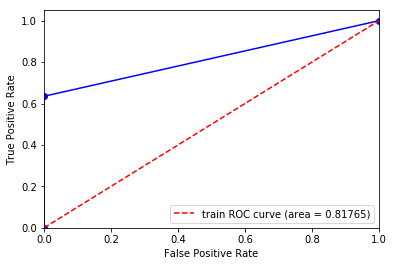

In [245]:
# Report the accuracy, precision, recall, F-score, and AUC for both training sets
import sklearn.metrics 
from prettytable import PrettyTable
table=PrettyTable([" "," accuracy"," precision"," recall","F-score","AUC"])
table.add_row(["train",metrics.accuracy_score(train_label, labels),metrics.precision_score(train_label, labels),metrics.recall_score(train_label, labels),metrics.f1_score(train_label, labels),metrics.roc_auc_score(train_label, labels)])
print(table)
print('confusion matrix for train:\n',metrics.confusion_matrix(train_label, labels))
fpr, tpr, thresholds = metrics.roc_curve(train_label, labels)
plt.figure()
plt.plot(fpr,tpr,"b-o")
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='train ROC curve (area = %0.5f)' %  metrics.roc_auc_score(train_label, labels))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

+------+--------------------+------------+--------------------+---------+--------------------+
|      |      accuracy      |  precision |       recall       | F-score |        AUC         |
+------+--------------------+------------+--------------------+---------+--------------------+
| test | 0.8761061946902655 |    1.0     | 0.6666666666666666 |   0.8   | 0.8333333333333333 |
+------+--------------------+------------+--------------------+---------+--------------------+
confusion matrix for train:
 [[71  0]
 [14 28]]


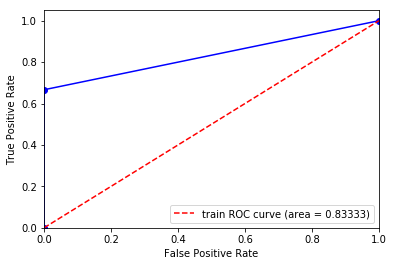

In [247]:
# Report the accuracy, precision, recall, F-score, and AUC for test sets
test_x=testset.iloc[:,1:31];test_label=testset.iloc[:,0].values;
labels2 = cluster.predict(test_x)
labels2[labels2 ==0 ] = cluster0;labels2[labels2 ==1 ] = cluster1;
table=PrettyTable([" "," accuracy"," precision"," recall","F-score","AUC"])
table.add_row(["test",metrics.accuracy_score(test_label, labels2),metrics.precision_score(test_label, labels2),metrics.recall_score(test_label, labels2),metrics.f1_score(test_label, labels2),metrics.roc_auc_score(test_label, labels2)])
print(table)
print('confusion matrix for train:\n',metrics.confusion_matrix(test_label, labels2))
fpr, tpr, thresholds = metrics.roc_curve(test_label, labels2)
plt.figure()
plt.plot(fpr,tpr,"b-o")
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='train ROC curve (area = %0.5f)' %  metrics.roc_auc_score(test_label, labels2))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [249]:
# Monte-Carlo Simulation: 30 times
accuracy5=[]; precision5=[];recall5=[]; F5=[]; AUC5=[];
accuracy6=[]; precision6=[];recall6=[]; F6=[]; AUC6=[];
for n in range(30):
    #  Choose 20% of the data randomly as the test set, the rest 80% as the trainning data
    testset_pos=positive.sample(frac=0.2,axis=0)
    trainset_pos=positive.drop(index=test_pos.index)
    testset_neg=negtive.sample(frac=0.2,axis=0)
    trainset_neg=negtive.drop(index=test_neg.index)
    testset=  pd.concat([testset_pos, testset_neg])
    trainset=  pd.concat([trainset_pos, trainset_neg])
    train_x=trainset.iloc[:,1:31];train_label=trainset.iloc[:,0].values;
    cluster = KMeans(n_clusters=2,n_init=30)
    labels = cluster.fit_predict(train_x)
    test_x=testset.iloc[:,1:31];test_label=testset.iloc[:,0].values;
    labels2 = cluster.predict(test_x)
    # find the closest 30 data points to each center
    d0 = cluster.transform(train_x)[:, 0];d1 = cluster.transform(train_x)[:, 1];
    ind0 = np.argsort(d0)[::][:30];ind1 = np.argsort(d1)[::][:30];
    train_true0=train_label[ind0];train_true1=train_label[ind1];
    counts0 = np.bincount(train_true0);counts1 = np.bincount(train_true1);
    cluster0=np.argmax(counts0);cluster1=np.argmax(counts1);
    labels[labels ==0 ] = cluster0;labels[labels ==1 ] = cluster1;
    labels2[labels2 ==0 ] = cluster0;labels2[labels2 ==1 ] = cluster1;
    accuracy5.append(metrics.accuracy_score(train_label, labels));accuracy6.append(metrics.accuracy_score(test_label, labels2));
    precision5.append(metrics.precision_score(train_label, labels));precision6.append(metrics.precision_score(test_label, labels2));
    recall5.append(metrics.recall_score(train_label, labels));recall6.append(metrics.recall_score(test_label, labels2));
    F5.append(metrics.f1_score(train_label, labels));F6.append(metrics.f1_score(test_label, labels2));
    AUC5.append(metrics.roc_auc_score(train_label, labels));AUC6.append(metrics.roc_auc_score(test_label, labels2));

In [252]:
# report the average of accuracy, precision, recall, F-score, and AUC for both training and test sets
table3=PrettyTable([" average "," accuracy"," precision"," recall","F-score","AUC"])
table3.add_row(["train",mean(accuracy5),mean(precision5),mean(recall5),mean(F5),mean(AUC5)])
table3.add_row(["test",mean(accuracy6),mean(precision6),mean(recall6),mean(F6),mean(AUC6)])
print(table3)

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  average  |      accuracy      |      precision     |       recall       |      F-score       |        AUC         |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   train   | 0.8324561403508771 | 0.8666666666666667 | 0.5505882352941176 | 0.6733812949640285 | 0.7752941176470586 |
|    test   | 0.8241887905604719 | 0.8630344827586207 | 0.5293650793650793 | 0.6542519455484873 | 0.763978314330427  |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+


In [317]:
# Spectral Clustering
from sklearn.cluster import SpectralClustering
#  Choose 20% of the data randomly as the test set, the rest 80% as the trainning data
testset_pos=positive.sample(frac=0.2,random_state=123 ,axis=0)
trainset_pos=positive.drop(index=test_pos.index)
testset_neg=negtive.sample(frac=0.2,random_state=123 ,axis=0)
trainset_neg=negtive.drop(index=test_neg.index)
testset=  pd.concat([testset_pos, testset_neg])
trainset=  pd.concat([trainset_pos, trainset_neg])
train_x=trainset.iloc[:,1:31];train_label=trainset.iloc[:,0].values;
train_x=preprocessing.normalize(train_x)
clustering = SpectralClustering(affinity='rbf',n_clusters=2,random_state=123,n_init=30).fit(train_x)

In [318]:
# find the closest 30 data points to each center
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(affinity='precomputed',n_components=2).fit_transform(clustering.affinity_matrix_ )
labels=clustering.labels_
dist0 = embedding[:, 0];dist1 = embedding[:, 1];
ind0 = np.argsort(dist0)[::][:30];ind1 = np.argsort(dist1)[::][:30];
tr_true0=train_label[ind0];tr_true1=train_label[ind1];
counts0 = np.bincount(tr_true0);counts1 = np.bincount(tr_true1);
cluster0=np.argmax(counts0);cluster1=np.argmax(counts1);
labels[labels ==0 ] = cluster0;labels[labels ==1 ] = cluster1;
print('the label of cluster 0 is:',cluster0)
print('the label of cluster 1 is:',cluster1)

the label of cluster 0 is: 0
the label of cluster 1 is: 1


+-------+--------------------+-------------------+--------------------+--------------------+--------------------+
|       |      accuracy      |      precision    |       recall       |      F-score       |        AUC         |
+-------+--------------------+-------------------+--------------------+--------------------+--------------------+
| train | 0.8881578947368421 | 0.968503937007874 | 0.7235294117647059 | 0.8282828282828283 | 0.8547716988893461 |
+-------+--------------------+-------------------+--------------------+--------------------+--------------------+
confusion matrix for train:
 [[282   4]
 [ 47 123]]


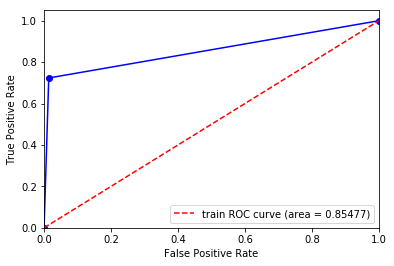

In [319]:
# Report the accuracy, precision, recall, F-score, and AUC for both training sets
table=PrettyTable([" "," accuracy"," precision"," recall","F-score","AUC"])
table.add_row(["train",metrics.accuracy_score(train_label, labels),metrics.precision_score(train_label, labels),metrics.recall_score(train_label, labels),metrics.f1_score(train_label, labels),metrics.roc_auc_score(train_label, labels)])
print(table)
print('confusion matrix for train:\n',metrics.confusion_matrix(train_label, labels))
fpr, tpr, thresholds = metrics.roc_curve(train_label, labels)
plt.figure()
plt.plot(fpr,tpr,"b-o")
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='train ROC curve (area = %0.5f)' %  metrics.roc_auc_score(train_label, labels))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

+------+--------------------+------------+--------------------+--------------------+--------------------+
|      |      accuracy      |  precision |       recall       |      F-score       |        AUC         |
+------+--------------------+------------+--------------------+--------------------+--------------------+
| test | 0.8938053097345132 |    1.0     | 0.7142857142857143 | 0.8333333333333333 | 0.8571428571428572 |
+------+--------------------+------------+--------------------+--------------------+--------------------+
confusion matrix for train:
 [[71  0]
 [12 30]]


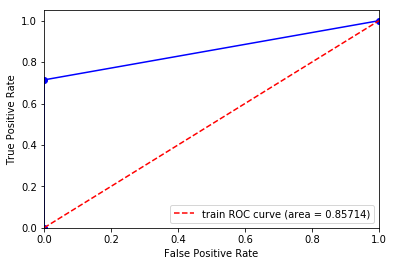

In [320]:
# Report the accuracy, precision, recall, F-score, and AUC for test sets
test_x=testset.iloc[:,1:31];test_label=testset.iloc[:,0].values;
test_x=preprocessing.normalize(test_x)
clustering2 = SpectralClustering(affinity='rbf',n_clusters=2,random_state=123).fit(test_x)
labels2 = clustering2.labels_
labels2[labels2 ==0 ] = cluster0;labels2[labels2 ==1 ] = cluster1;
table=PrettyTable([" "," accuracy"," precision"," recall","F-score","AUC"])
table.add_row(["test",metrics.accuracy_score(test_label, labels2),metrics.precision_score(test_label, labels2),metrics.recall_score(test_label, labels2),metrics.f1_score(test_label, labels2),metrics.roc_auc_score(test_label, labels2)])
print(table)
print('confusion matrix for train:\n',metrics.confusion_matrix(test_label, labels2))
fpr, tpr, thresholds = metrics.roc_curve(test_label, labels2)
plt.figure()
plt.plot(fpr,tpr,"b-o")
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='train ROC curve (area = %0.5f)' %  metrics.roc_auc_score(test_label, labels2))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [321]:
# Monte-Carlo Simulation: 30 times
accuracy7=[]; precision7=[];recall7=[]; F7=[]; AUC7=[];
accuracy8=[]; precision8=[];recall8=[]; F8=[]; AUC8=[];
for n in range(30):
    #  Choose 20% of the data randomly as the test set, the rest 80% as the trainning data
    testset_pos=positive.sample(frac=0.2,axis=0)
    trainset_pos=positive.drop(index=test_pos.index)
    testset_neg=negtive.sample(frac=0.2,axis=0)
    trainset_neg=negtive.drop(index=test_neg.index)
    testset=  pd.concat([testset_pos, testset_neg])
    trainset=  pd.concat([trainset_pos, trainset_neg])
    train_x=trainset.iloc[:,1:31];train_label=trainset.iloc[:,0].values;
    train_x=preprocessing.normalize(train_x)
    clustering = SpectralClustering(affinity='rbf',n_clusters=2,n_init=30).fit(train_x)
    labels=clustering.labels_
    # find the closest 30 data points to each center
    embedding = SpectralEmbedding(affinity='precomputed',n_components=2).fit_transform(clustering.affinity_matrix_ )
    labels=clustering.labels_
    dist0 = embedding[:, 0];dist1 = embedding[:, 1];
    ind0 = np.argsort(dist0)[::][:30];ind1 = np.argsort(dist1)[::][:30];
    tr_true0=train_label[ind0];tr_true1=train_label[ind1];
    counts0 = np.bincount(tr_true0);counts1 = np.bincount(tr_true1);
    cluster0=np.argmax(counts0);cluster1=np.argmax(counts1);
    labels[labels ==0 ] = cluster0;labels[labels ==1 ] = cluster1;
    test_x=testset.iloc[:,1:31];test_label=testset.iloc[:,0].values;
    test_x=preprocessing.normalize(test_x)
    clustering2 = SpectralClustering(affinity='rbf',n_clusters=2).fit(test_x)
    labels2 = clustering2.labels_
    labels2[labels2 ==0 ] = cluster0;labels2[labels2 ==1 ] = cluster1;
    accuracy7.append(metrics.accuracy_score(train_label, labels));accuracy8.append(metrics.accuracy_score(test_label, labels2));
    precision7.append(metrics.precision_score(train_label, labels));precision8.append(metrics.precision_score(test_label, labels2));
    recall7.append(metrics.recall_score(train_label, labels));recall8.append(metrics.recall_score(test_label, labels2));
    F7.append(metrics.f1_score(train_label, labels));F8.append(metrics.f1_score(test_label, labels2));
    AUC7.append(metrics.roc_auc_score(train_label, labels));AUC8.append(metrics.roc_auc_score(test_label, labels2));

In [322]:
# report the average of accuracy, precision, recall, F-score, and AUC for both training and test sets
table4=PrettyTable([" average "," accuracy"," precision"," recall","F-score","AUC"])
table4.add_row(["train",mean(accuracy7),mean(precision7),mean(recall7),mean(F7),mean(AUC7)])
table4.add_row(["test",mean(accuracy8),mean(precision8),mean(recall8),mean(F8),mean(AUC8)])
print(table4)

+-----------+--------------------+--------------------+--------------------+--------------------+-------------------+
|  average  |      accuracy      |      precision     |       recall       |      F-score       |        AUC        |
+-----------+--------------------+--------------------+--------------------+--------------------+-------------------+
|   train   | 0.7070175438596492 | 0.7758530183727035 | 0.6192156862745096 | 0.678971410835138  | 0.689211572740985 |
|    test   | 0.6752212389380529 | 0.7405003502336487 | 0.5920634920634921 | 0.6453888534837804 | 0.658238318801699 |
+-----------+--------------------+--------------------+--------------------+--------------------+-------------------+


In [323]:
print('Supervised Learning:\n');print(table1);
print('Semi-Supervised Learning:\n');print(table2);
print('Unsupervised Learning:\n');print(table3);
print('Spectral Clustering:\n');print(table4);
print('Supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled')
print('Semi-supervised learning with half of the data set labeled works better than unsupervised learning')

Supervised Learning:

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  average  |      accuracy      |      precision     |       recall       |      F-score       |        AUC         |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   train   | 0.984722222222222  | 0.9861300041466446 | 0.9727450980392155 | 0.9793648142888879 | 0.9982716303304539 |
|    test   | 0.9657817109144543 | 0.9544719027339112 | 0.9547619047619046 | 0.9540878456843721 | 0.997853789403085  |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
Semi-Supervised Learning:

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  average  |      accuracy      |      precision     |       recall       |      F-score       |        AUC         |